# Resources used to build this script

https://earth-env-data-science.github.io/lectures/xarray/xarray-part2.html

erddap_xarray.ipynb from the NOAA hackour 2025 folder

# Clear memory

In [71]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Look at variables in memory

In [72]:
whos

Interactive namespace is empty.


# Import packages

In [73]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Read metadata from NOAA OISST v2.1 from ERDDAP

In [74]:
url = "https://comet.nefsc.noaa.gov/erddap/griddap/noaa_psl_2d74_d418_a6fb"
ds = xr.open_dataset(url)
print(f"Size in GB: {ds.nbytes / 1e9:.2f} GB")
ds

Size in GB: 2.17 GB


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 523, latitude: 720, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-03-01
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
Data variables:
    sst        (time, latitude, longitude) float32 2GB ...
Attributes: (12/35)
    cdm_data_type:              Grid
    comment:                    Reynolds, et al.(2007) Daily High-Resolution-...
    Conventions:                CF-1.10, COARDS, ACDD-1.3
    creator_name:               NOAA/National Centers for Environmental Infor...
    creator_type:               group
    creator_url:                https://www.noaa.gov/
    ...                         ...
    testOutOfDate:              now-114days
    time_coverage_end:          2025-03-01T00:00:00Z
    time_coverage_start:        1981-09-01T00:00:00Z
    title:                      Sea Surface Tempearture, NOAA/NCEI Optimum In...
    version:                    Version 2.1
    Westernmost_Easting:        0.125

# Set parameters

In [75]:
date_range = ("1982-01-01", "2024-12-01")
lat_min = 0
lat_max = 20
lon_min = -30; lon_min = lon_min + 360
lon_max = -10; lon_max = lon_max + 360
colormap = 'RdBu_r'

# Load subset of global SST dataset and create a data cube

In [76]:
dc = ds['sst'].sel(latitude=slice(lat_min, lat_max), 
                   longitude=slice(lon_min, lon_max), 
                   time=slice(date_range[0], date_range[1]))
print(f"Size in MB: {dc.nbytes / 1e6:.2f} MB")
print(dc.shape)
dc

Size in MB: 13.21 MB
(516, 80, 80)


<xarray.DataArray 'sst' (time: 516, latitude: 80, longitude: 80)> Size: 13MB
[3302400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2024-12-01
  * latitude   (latitude) float32 320B 0.125 0.375 0.625 ... 19.38 19.62 19.88
  * longitude  (longitude) float32 320B 330.1 330.4 330.6 ... 349.4 349.6 349.9
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

# Code to hang onto

# Create monthly climatology and monthly anomalies
## climatology will have one layer for each month
## anomalies will be the difference between climatology and every month in dc

In [77]:
climatology = dc.groupby("time.month").mean("time")
dc_anom = dc.groupby("time.month") - climatology
print(climatology.shape)
print(dc_anom.shape)

(12, 80, 80)
(516, 80, 80)


# Plots monthly means over space, and climatology

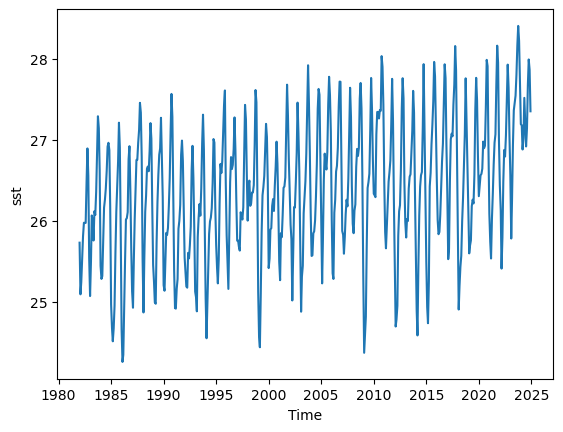

In [78]:
#average over all space against time (monthly means over the domain)
dc.mean(dim=['latitude', 'longitude']).plot();

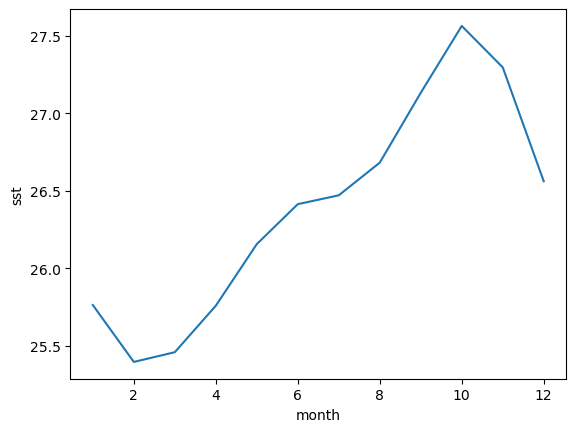

In [79]:
climatology.mean(dim = ['latitude','longitude']).plot()

# Plot the anomaly as a time series 

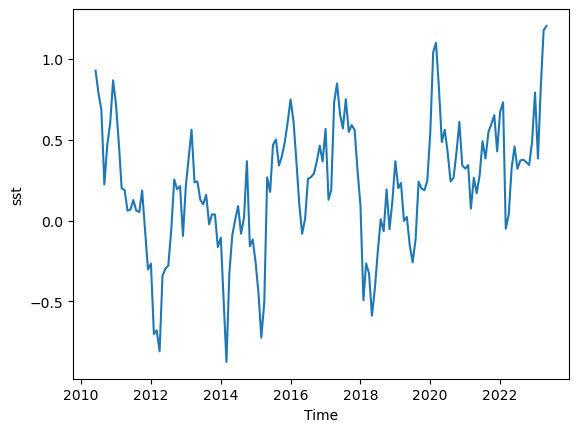

In [98]:
t1 = '2010-06-01'; t2 = '2023-05-01'
ts = dc_anom.sel(time=slice(t1, t2)).mean(dim = ['latitude','longitude'])
ts.plot()

# Plot a particular time period

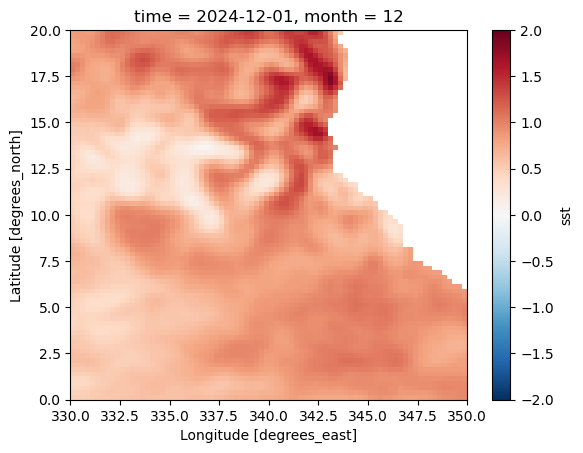

In [121]:
t = "2024-12-01"; #date
dc_anom.sel(time = t).plot(cmap = colormap, vmin = -2, vmax = 2)

# Produce monthly anomalies by a different method, then compare
## climatology2 is the second climatology

In [80]:
#dc.groupby?

#print(dc.time.dt)
#print(dc.time.dt.month)

#gb = ds.sst.groupby(ds.time.dt.month)
#gb

gb = dc.groupby('time.month')
gb
type(gb)

#there are only 2 things inside this particular groupby, so you can choose any name you want
for group_name, group_da in gb:
    # stop iterating after the first loop
    break 
print(group_name)
group_da

#gb.map(np.mean)
climatology2 = gb.mean(dim='time')
climatology2.shape

1


(12, 80, 80)

In [81]:
climatology2

<xarray.DataArray 'sst' (month: 12, latitude: 80, longitude: 80)> Size: 307kB
array([[[27.401087, 27.38976 , 27.37525 , ..., 27.218723, 27.245491,
         27.272175],
        [27.428806, 27.412708, 27.400051, ..., 27.388477, 27.415108,
         27.439978],
        [27.464703, 27.447989, 27.436024, ..., 27.549099, 27.56787 ,
         27.589865],
        ...,
        [23.285814, 23.24093 , 23.194351, ...,       nan,       nan,
               nan],
        [23.252151, 23.207748, 23.166632, ...,       nan,       nan,
               nan],
        [23.218649, 23.17366 , 23.136662, ...,       nan,       nan,
               nan]],

       [[27.610943, 27.623043, 27.640762, ..., 27.746778, 27.771595,
         27.78992 ],
        [27.619318, 27.63053 , 27.648956, ..., 27.878567, 27.904488,
         27.923405],
        [27.629192, 27.638575, 27.654356, ..., 28.009136, 28.033972,
         28.05151 ],
...
        [25.676697, 25.649658, 25.631031, ...,       nan,       nan,
               nan],
        [25.633217, 25.60921 , 25.58982 , ...,       nan,       nan,
               nan],
        [25.5961  , 25.573294, 25.549969, ...,       nan,       nan,
               nan]],

       [[27.11531 , 27.102047, 27.08318 , ..., 26.570269, 26.599962,
         26.633038],
        [27.175041, 27.162077, 27.146069, ..., 26.793945, 26.823023,
         26.856714],
        [27.24811 , 27.238049, 27.227125, ..., 26.985483, 27.014238,
         27.05102 ],
        ...,
        [24.538124, 24.511763, 24.477629, ...,       nan,       nan,
               nan],
        [24.499317, 24.471066, 24.436346, ...,       nan,       nan,
               nan],
        [24.464613, 24.4342  , 24.396984, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 320B 0.125 0.375 0.625 ... 19.38 19.62 19.88
  * longitude  (longitude) float32 320B 330.1 330.4 330.6 ... 349.4 349.6 349.9
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

# Plot two climatologies next to one another

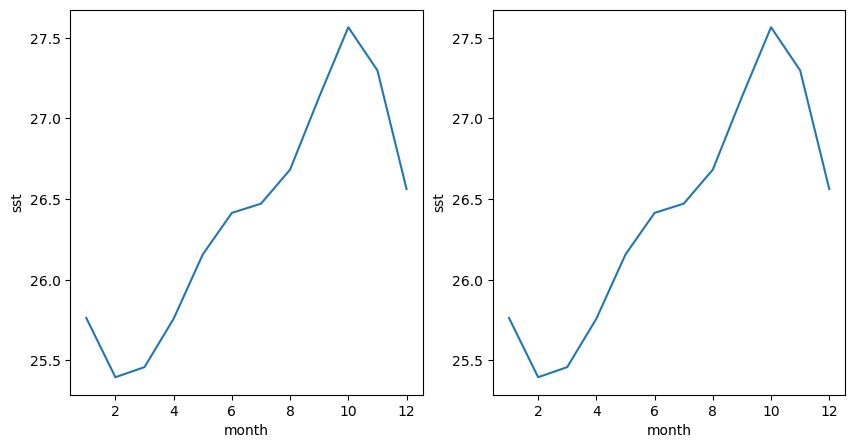

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
climatology.mean(dim = ['latitude','longitude']).plot(ax = axes[0])
climatology2.mean(dim=['latitude', 'longitude']).plot(ax=axes[1])

# Plot a single anomaly map from each method, to compare

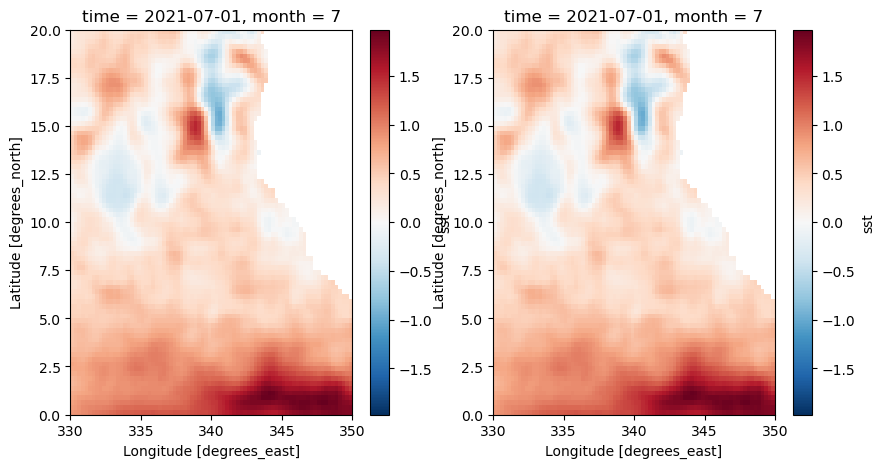

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
t = "2021-07-01"; m = 7; #date and month
dc_anom.sel(time = t).plot(ax = axes[0])
(dc.sel(time = t) - climatology2.sel(month = m)).plot(ax=axes[1])